***
***
# Machine Learning for Social Scientists

***
***

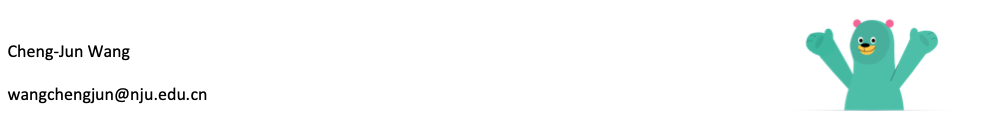


<div>
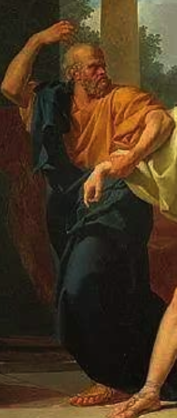
</div>

> “Know thyself.” ― Socrates

> “The unexamined life is not worth living.” ― Socrates 

> “Wonder is the beginning of wisdom.” ― Socrates

>  “True wisdom comes to each of us when we realize how little we understand about life, ourselves, and the world around us.” 
― Socrates


<div>
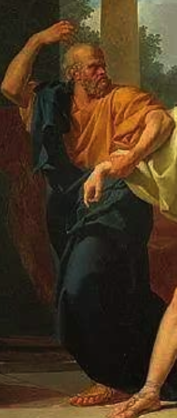
</div>

> “Education is the kindling of a flame, not the filling of a vessel.” ― Socrates

> “Strong minds discuss ideas, average minds discuss events, weak minds discuss people.” 
― Socrates

- Computational Social Science
    - Lazer,et al. 2009; Watts, 2007
- Aritifical Intelligence
    - Machine Learning, e.g., Neural Networks
- Data Science
    - The center of Calculation

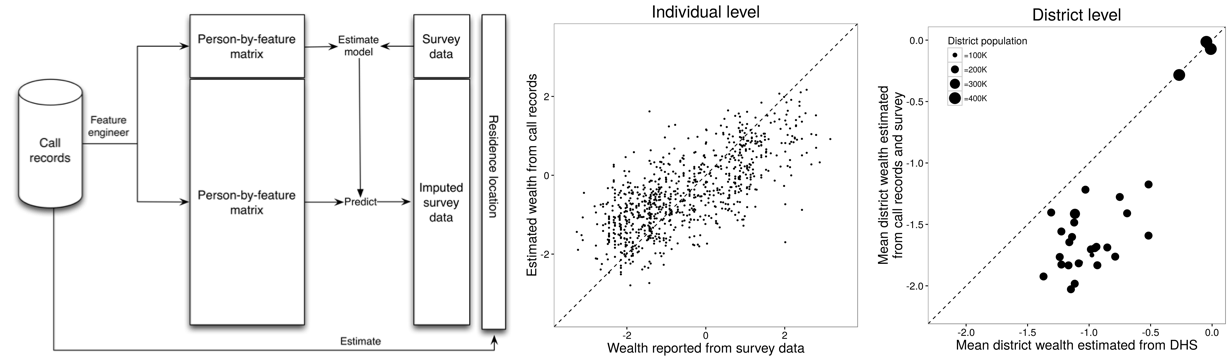

Blumenstock, Cadamuro, and On (2015)

Big data and surveys/content analysis are complements rather than substitutes

- Big data sources will not eliminate the need to ask people questions/content analysis
- Big data sources can actually increase the value of asking questions/content analysis
- when there is more big data, people will want more surveys/content analysis.

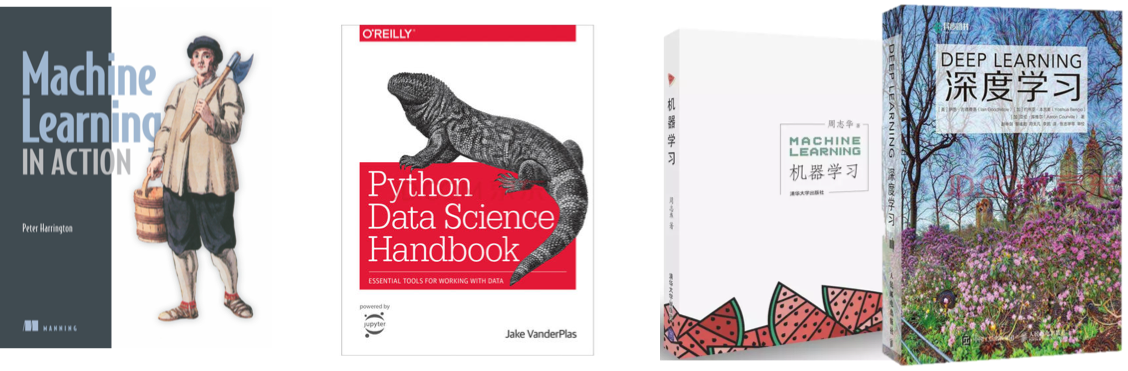

1. **机器学习简介**：从泰坦尼克号讲起

> 本部分介绍基于python进行机器学习的基本逻辑(需要学员提前安装anaconda)、Scikit-Learn、机器学习模型的参数和模型校验、特征提取。

2. **机器学习初步**: 朴素贝叶斯与线性回归
3. **机器学习进阶**: 支持向量机与随机森林
4. **机器学习扩展**: 基于Pytorch的神经网络模型

https://github.com/computational-class/machine-learning

***
***
# 机器学习简介：

###  从泰坦尼克号讲起

***
***

王成军 

wangchengjun@nju.edu.cn



<img src = './img/machine2.jpg' width = 800>

## 1、 监督式学习

- 目标变量或结果变量（或因变量）$y$
- 特征（自变量）$X$
- 生成一个将输入值映射到期望输出值的函数 $y = f(X)$
- 训练过程会一直持续，直到模型在训练数据上获得期望的准确度。
- 监督式学习的例子有：回归、决策树、随机森林、K–近邻算法、逻辑回归等。

## 2、非监督式学习

- 没有任何目标变量或结果变量要预测或估计。
- 这个算法用在不同的组内聚类分析。
- 非监督式学习的例子有：关联算法和 Kmeans算法。

## 3、强化学习

- 训练机器进行决策，例如Alphago。
- 机器被放在一个能让它通过反复试错来训练自己的环境中。
- 从过去的经验中进行学习，并利用学到的知识作出判断。 
- 例子：马尔可夫决策过程。

Chess. Here, the agent decides upon a series of moves depending on the state of the board (the environment), and the
reward can be defined as win or lose at the end of the game:

<img src = './img/mlprocess.png' width = 800>

---

# 泰坦尼克号数据分析
---
王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

<img src = './img/titanic.jpg' width = 800>

<img src = './img/titanic3.jpg' width = 800>

- 英国白星航运公司邮轮，排水量46000吨，1912年4月2日试航。当时世界上体积最庞大、有“永不沉没”的美誉 。
- 处女航，从英国南安普敦出发，驶向美国纽约。
- 1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞
- 次日凌晨2时20分左右，裂成两截后沉入大西洋底3700米处。
- 2224人，逾1500人丧生，仅333具罹难者遗体被寻回。
- 和平时期死伤人数最为惨重的一次海难；
- 其残骸直至1985年才被再度发现。

In [9]:
import pandas as pd
import numpy as np
# Avoid showing warnings
pd.set_option('mode.chained_assignment', None)
# https://www.kaggle.com/c/titanic
train = pd.read_csv('../data/titanic_train.csv',  sep = ",")
test  = pd.read_csv('../data/titanic_test.csv',   sep = ",")
train.shape, test.shape

((891, 12), (418, 12))

In [10]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| **Variable** | **Definition**                             | **Key**                                        |
| :----------- | :----------------------------------------- | :--------------------------------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Cleaning or Feature Engineering

In [11]:
# dealing with missing data
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Fare"] = train["Fare"].fillna(train["Fare"].median())
# Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna('S')

In [12]:
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

#train['female'] = [1 if i =="female" else 0 for i in train['Sex']]

In [13]:
train['Sex'] = train['Sex'].fillna('ffill')

In [14]:
# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

## Describing Data

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Passengers that survived vs passengers that passed away
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# As proportions
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [18]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [19]:
# seleting the dataset of females
train[train['Sex']==1][:3] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0


In [20]:
# Males that survived vs males that passed away
train[["Survived", 'Fare']][train["Sex"] == 0][:3]

,Survived,Fare
0,0,7.2500
4,0,8.0500
5,0,8.4583


In [21]:
# Males that survived vs males that passed away
train["Survived"][train["Sex"] == 0].value_counts() 

0    468
1    109
Name: Survived, dtype: int64

In [22]:
# Females that survived vs Females that passed away
train["Survived"][train["Sex"] == 1].value_counts() 

1    233
0     81
Name: Survived, dtype: int64

In [23]:
# Normalized male survival
train["Survived"][train["Sex"] == 0].value_counts(normalize = True) 

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [24]:
# Normalized female survival
train["Survived"][train["Sex"] == 1].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [25]:
# Create the column Child, and indicate whether child or not a child. Print the new column.
train["Child"] = float('NaN')
train.Child[train.Age <=18] = 1
train.Child[train.Age > 18] = 0 

In [26]:
# Normalized Survival Rates for under 18
train.Survived[train.Child == 1].value_counts(normalize = True)

1    0.503597
0    0.496403
Name: Survived, dtype: float64

In [27]:
# Create the column Child, and indicate whether child or not a child. Print the new column.
train["Child"] = float('NaN')
train.Child[train.Age <=5] = 1
train.Child[train.Age > 5] = 0
# Normalized Survival Rates for under 18
train.Survived[train.Child == 1].value_counts(normalize = True)

1    0.704545
0    0.295455
Name: Survived, dtype: float64

In [28]:
train.pivot_table('Survived', ['Sex'], 'Pclass')

Pclass,1,2,3
Sex,,,
0,0.368852,0.157407,0.135447
1,0.968085,0.921053,0.500000


In [29]:
age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.800000  0.600000  0.215686
    (18, 80]  0.350427  0.086022  0.121622
1   (0, 18]   0.909091  1.000000  0.511628
    (18, 80]  0.975904  0.903226  0.495050

In [30]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
fare = pd.qcut(train['Fare'], 2)
train.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'])

Fare         (-0.001, 14.454]                     (14.454, 512.329]            \
Pclass                      1         2         3                 1         2   
Sex Age                                                                         
0   (0, 18]               NaN  0.000000  0.260870          0.800000  0.818182   
    (18, 80]              0.0  0.118644  0.106122          0.369369  0.029412   
1   (0, 18]               NaN  1.000000  0.714286          0.909091  1.000000   
    (18, 80]              NaN  0.884615  0.533333          0.975904  0.916667   

Fare                    
Pclass               3  
Sex Age                 
0   (0, 18]   0.178571  
    (18, 80]  0.196078  
1   (0, 18]   0.318182  
    (18, 80]  0.439024

# Data visualization

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

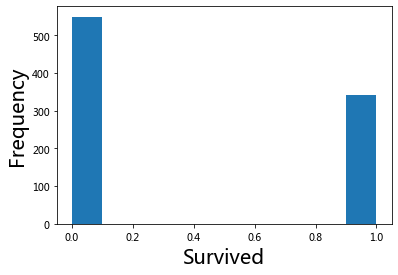

In [33]:
plt.hist(train['Survived'].tolist())
plt.xlabel('Survived', fontsize = 20)
plt.ylabel('Frequency', fontsize= 20)
plt.show()

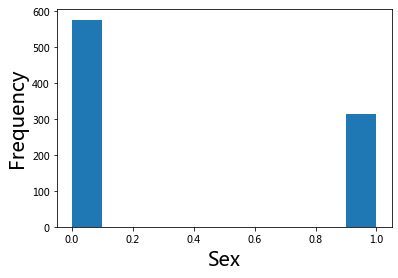

In [34]:
plt.hist(train['Sex'].tolist())
plt.xlabel('Sex', fontsize = 20)
plt.ylabel('Frequency', fontsize= 20)
plt.show()

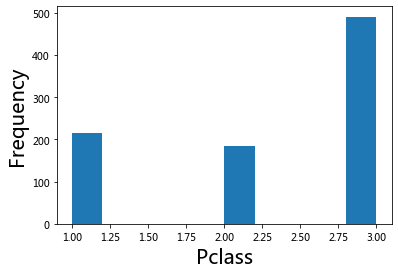

In [35]:
plt.hist(train['Pclass'].tolist())
plt.xlabel('Pclass', fontsize = 20)
plt.ylabel('Frequency', fontsize= 20)
plt.show()

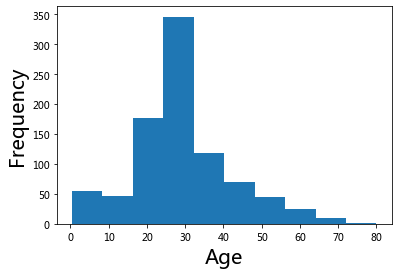

In [36]:
plt.hist(train['Age'].tolist())
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Frequency', fontsize= 20)
plt.show()

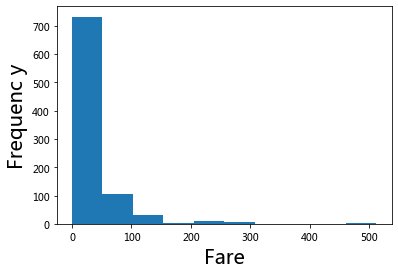

In [37]:
plt.hist(train['Fare'].tolist())
plt.xlabel('Fare', fontsize = 20)
plt.ylabel('Frequenc y', fontsize= 20)
plt.show() 

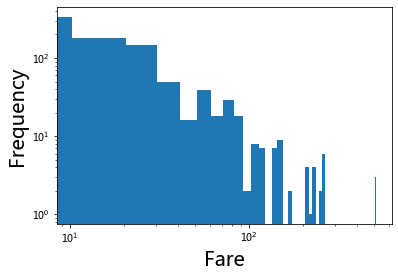

In [38]:
plt.hist(train['Fare'].tolist(), bins = 50)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Fare', fontsize = 20)
plt.ylabel('Frequency', fontsize= 20)
plt.show()

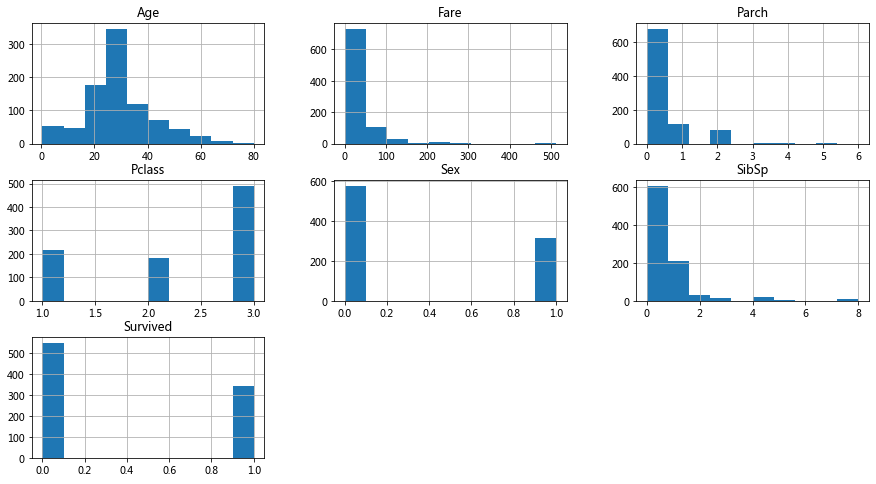

In [39]:
df2 = train[["Survived","Sex", "Pclass", "Age", "Fare", "SibSp", "Parch", "Embarked"]]
pd.DataFrame.hist(df2, figsize = [15,8]);

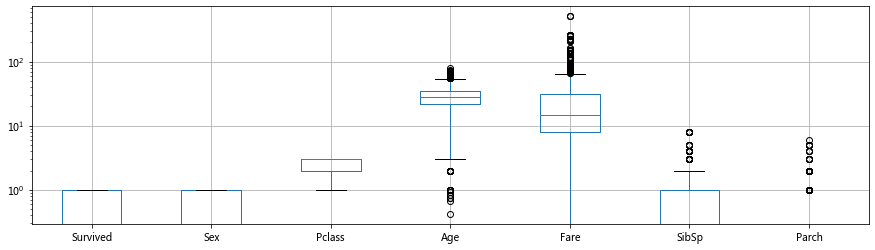

In [40]:
fig = plt.figure(figsize=(15,4))
df2.boxplot(return_type='dict')
plt.yscale('log')
plt.show()

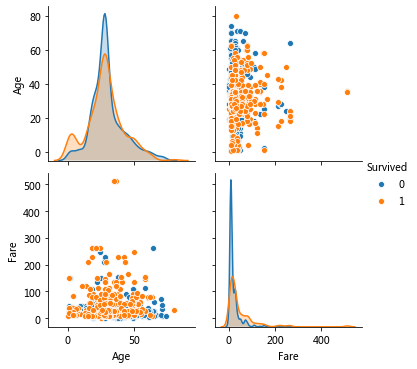

In [41]:
# conda install seaborn
import seaborn 
import warnings
warnings.filterwarnings("ignore")

df = train[["Survived", "Age", "Fare"]]
seaborn.pairplot(df, hue = "Survived"); 

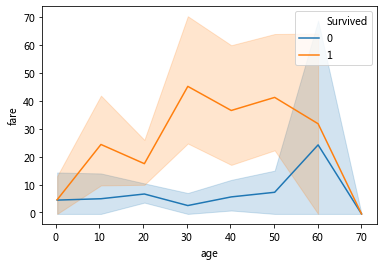

In [42]:
train['fare'] = [i.left for i in pd.cut(train['Fare'], 8).tolist()]
train['age'] = [i.left for i in pd.cut(train['Age'], 8).tolist()]

seaborn.lineplot(x="age", y="fare", hue="Survived", #style="Survived", 
                 data=train);
#plt.xscale('log');

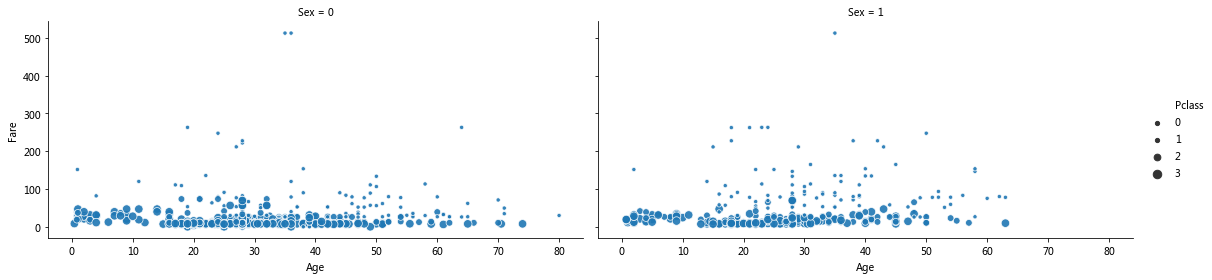

In [43]:
seaborn.relplot(x="Age", y="Fare", 
                col="Sex", 
                size="Pclass", 
                alpha=.9,
            height=4, aspect = 2, data=train);

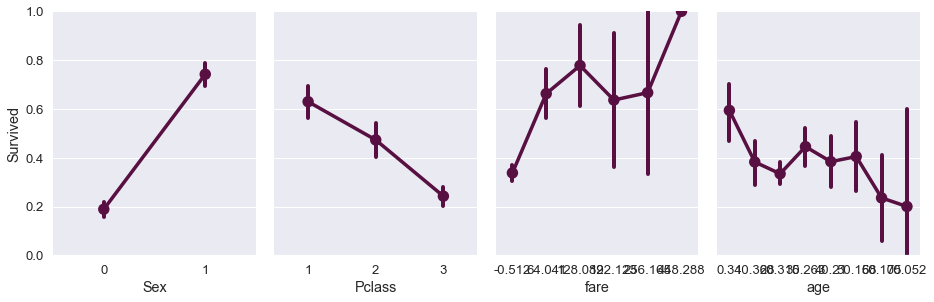

In [44]:
# Set up a grid to plot survival probability against several variables
seaborn.set(font_scale=1.2)

g = seaborn.PairGrid(train, y_vars="Survived",
                 x_vars=[ "Sex","Pclass", "fare", "age"],
                 height=4, aspect=.8)

# Draw a seaborn pointplot onto each Axes
g.map(seaborn.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
seaborn.despine(fig=g.fig, left=True)

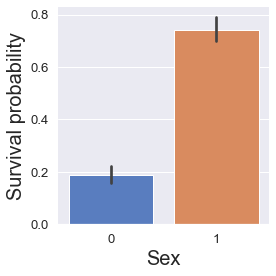

In [45]:
# Draw a nested barplot to show survival for class and sex
g = seaborn.catplot(x="Sex", y="Survived", data=train,
                height=4, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability", fontsize = 20)
g.set_xlabels("Sex", fontsize = 20);

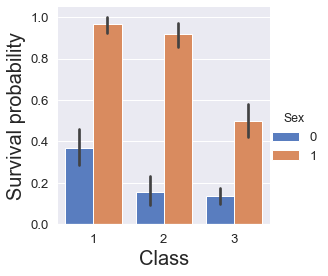

In [46]:
# Draw a nested barplot to show survival for class and sex
g = seaborn.catplot(x="Pclass", y="Survived", hue="Sex", data=train,
                height=4, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability", fontsize = 20)
g.set_xlabels("Class", fontsize = 20);

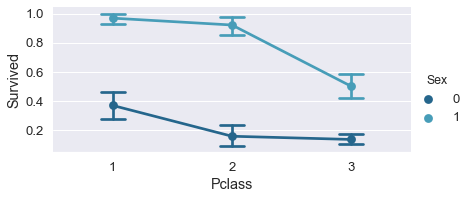

In [47]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = seaborn.catplot(x="Pclass", y="Survived", hue="Sex", #col="diet",
                capsize=.2, palette="YlGnBu_d", height=3, aspect=2,
                kind="point", data=train)
g.despine(left=True);

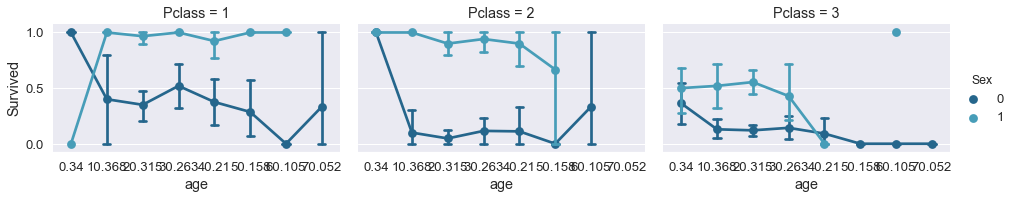

In [48]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = seaborn.catplot(x="age", y="Survived", hue="Sex", col="Pclass",
                capsize=.2, palette="YlGnBu_d", height=3, aspect=1.5,
                kind="point", data=train)
g.despine(left=True);

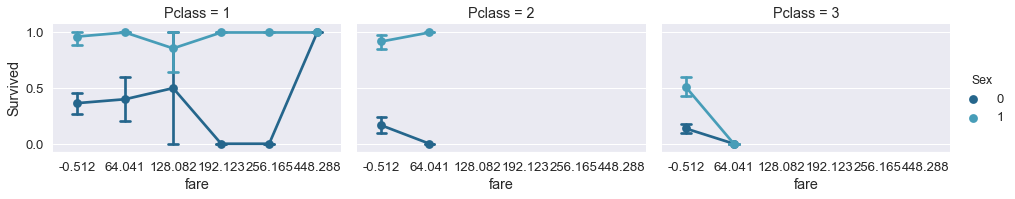

In [49]:
# Draw a pointplot to show pulse as a function of three categorical factors
g = seaborn.catplot(x="fare", y="Survived", hue="Sex", col="Pclass",
                capsize=.2, palette="YlGnBu_d", height=3, aspect=1.5,
                kind="point", data=train)
g.despine(left=True);

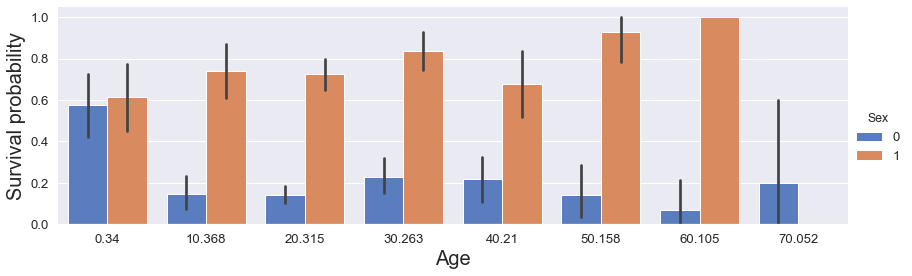

In [50]:
# Draw a nested barplot to show survival for class and sex
g = seaborn.catplot(x="age", y="Survived", hue="Sex", data=train,
                height=4, aspect = 3, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability", fontsize = 20)
g.set_xlabels("Age", fontsize = 20);

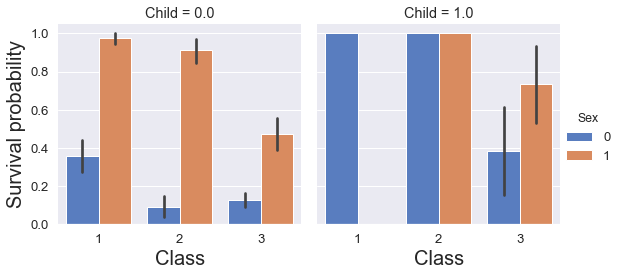

In [51]:
# Draw a nested barplot to show survival for class and sex
g = seaborn.catplot(x="Pclass", y="Survived", hue="Sex", col ="Child" , data=train,
                height=4, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival probability", fontsize = 20)
g.set_xlabels("Class", fontsize = 20);

## Using Decsion Tree with Sklearn

In [52]:
from sklearn.tree import DecisionTreeClassifier

#Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
#Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
#Look at the importance of the included features and print the score
print('feature importance: ', *my_tree_one.feature_importances_)
# Returns the mean accuracy on the given "test" data and labels.
print('training score: ', my_tree_one.score(features_one, target))

feature importance:  0.12126833269802739 0.3127400904012089 0.23646794178477273 0.32952363511599086
training score:  0.9775533108866442


# Why this is the wrong way!

In [53]:
# Impute the missing value with the median
test.Fare[152] = test.Fare.median()
test["Age"] = test["Age"].fillna(test["Age"].median())
#Convert the male and female groups to integer form
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

#Impute the Embarked variable
test["Embarked"] = test["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

In [54]:
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values
# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)
# Create a data frame with two columns: PassengerId & Survived. 
# Survived contains your predictions
PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

In [55]:
my_solution[:5]

,Survived
892,0
893,0
894,1
895,1
896,1


In [56]:
# Check that your data frame has 418 entries
my_solution.shape

(418, 1)

In [57]:
# Write your solution to a csv file with the name my_solution.csv 
my_solution.to_csv("../data/tatanic_solution_one.csv", 
                   index_label = ["PassengerId"])

In [58]:
# Create a new array with the added features: features_two
features_two = train[["Pclass","Age","Sex","Fare",\
                      "SibSp", "Parch", "Embarked"]].values

my_tree_two = DecisionTreeClassifier()
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two, target))

0.9797979797979798


In [59]:
# Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = DecisionTreeClassifier(max_depth = max_depth, 
                                          min_samples_split = min_samples_split, 
                                          random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

# Print the score of the new decison tree
print(my_tree_two.score(features_two, target))

0.9057239057239057


In [60]:
# create a new train set with the new variable
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

# Create a new decision tree my_tree_three
features_three = train[["Pclass", "Sex", "Age", \
                        "Fare", "SibSp", "Parch", "family_size"]].values

my_tree_three = DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

0.9797979797979798


## Using Random Forest  with Sklearn

In [61]:
from sklearn.ensemble import RandomForestClassifier

features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building the Forest: my_forest
n_estimators = 100
forest = RandomForestClassifier()
my_forest = forest.fit(features_forest, target)

print('Training score: ', my_forest.score(features_forest, target))

# Compute predictions and print the length of the prediction vector:test_features, pred_forest
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)

Training score:  0.9797979797979798


In [62]:
from sklearn.ensemble import RandomForestClassifier

features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building the Forest: my_forest
n_estimators = 100
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, 
                                n_estimators = n_estimators, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Print the score of the random forest
print(my_forest.score(features_forest, target))

# Compute predictions and print the length of the prediction vector:test_features, pred_forest
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)

0.9393939393939394


In [63]:
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

#Compute and print the mean accuracy score for both models
print(my_tree_two.score(features_two, target))
print(my_forest.score(features_two, target))

[0.14130255 0.17906027 0.41616727 0.17938711 0.05039699 0.01923751
 0.0144483 ]
[0.10384741 0.20139027 0.31989322 0.24602858 0.05272693 0.04159232
 0.03452128]
0.9057239057239057
0.9393939393939394


# 作业
https://www.datacamp.com/community/tutorials/the-importance-of-preprocessing-in-data-science-and-the-machine-learning-pipeline-i-centering-scaling-and-k-nearest-neighbours

# Readings

- The "Python Machine Learning" book code repository and info resource https://github.com/rasbt/python-machine-learning-book
- An Introduction to Statistical Learning (James, Witten, Hastie, Tibshirani, 2013) : Python code https://github.com/JWarmenhoven/ISLR-python
- BuildingMachineLearningSystemsWithPython https://github.com/luispedro/BuildingMachineLearningSystemsWithPython

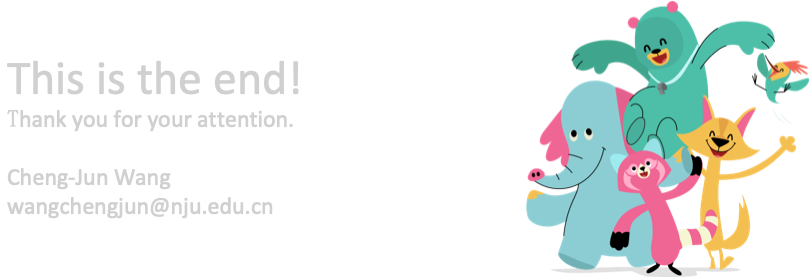

<!--NAVIGATION-->
< [Contents](Index.ipynb) | [Introducing Scikit-Learn](06.02-machine-learning-with-sklearn.ipynb) >